In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-titqfz7m
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-titqfz7m
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266985 sha256=402dbd7f94a38155b900c22f931da52acc5516be962c828774087f08217036d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-4p2ceadi/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free

In [2]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


In [3]:
import detectron2
#from detectron2.utils.logger import setup_logger
#setup_logger()

# import some common libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities

#from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
#from detectron2.data import MetadataCatalog


In [4]:
# mount your gdrive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dataset1_train", {}, "/content/drive/My Drive/ML/all_May_2020/train/trainval.json", "/content/drive/My Drive/ML/all_May_2020/train/images")
register_coco_instances("dataset1_val", {}, "/content/drive/My Drive/ML/all_May_2020/val/trainval.json", "/content/drive/My Drive/ML/all_May_2020/val/images")
papers_metadata = MetadataCatalog.get("dataset1_train") #return the Metadata instance associated with this name
dataset_dicts = DatasetCatalog.get("dataset1_train") # Call the registered function and return dataset annotations


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [16]:
cfg = get_cfg() #load default config
cfg.merge_from_file('/content/drive/My Drive/ML/detectron2/configs/DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml')
cfg.MODEL.WEIGHTS = '/content/drive/My Drive/ML/output/20200617T1025/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 # set threshold for this model
cfg.DATASETS.TRAIN = ("dataset1_train")
predictor = DefaultPredictor(cfg)


Config '/content/drive/My Drive/ML/detectron2/configs/DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (10, 1024) in the checkpoint but (6, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (10,) in the checkpoint but (6,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (36, 1024) in the checkpoint but (20, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (36,) in the checkpoint but (20,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (9, 256, 1, 1) in the checkpoint but (5, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatibl

In [18]:
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/My Drive/ML/all_May_2020/val1/images/49817.jpeg")
outputs = predictor(im)
print(outputs)

{'instances': Instances(num_instances=0, image_height=794, image_width=596, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64), pred_masks: tensor([], device='cuda:0', size=(0, 794, 596), dtype=torch.uint8)])}


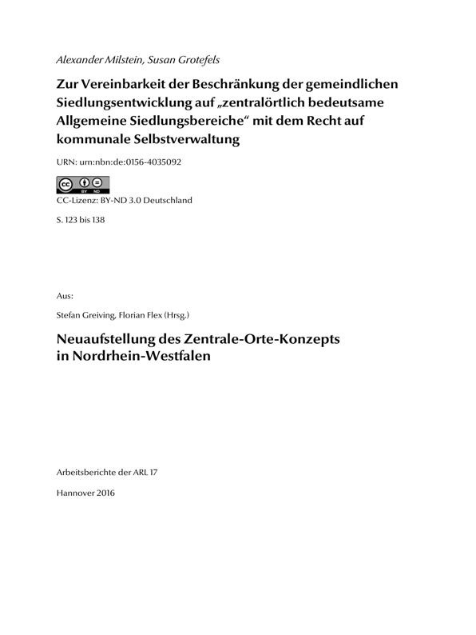

In [19]:
v = Visualizer(im[:, :, ::-1], 
               metadata= MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
               scale=0.8, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
               )
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
# Resize all the images 
#def resize_im(image, width, height):
#    Image_a=Image.open(image)# Resizing the image
#    resized_im = Image_a.resize((width, height))
#    return resized_im